# Linear Models For Regression & Classification

### Agenda
  * Simple Linear Regression using Ordinary Least Squares
  * Gradient Descent Algorithm
  * Regularized Regression Methods - Ridge, Lasso, ElasticNet
  * Logistic Regression for Classification
  * Online Learning Methods - Stochastic Gradient Descent & Passive Aggrasive
  * Robust Regression - Dealing with outliers & Model errors
  * Polynomial Regression
  * Bias-Variance Tradeoff

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Simple Linear Regression using Ordinary Least Squares
    * Feature consist of p independent variables(p-dim)
    * Target/dependent variable is represented by y
    * Relation between Feature and Target is represented by the following equation
     y = mx +b

In [28]:
from sklearn.linear_model import LinearRegression

  * Residual Squared Sum(RSS of error) = sum of square of Difference between Actual value and predicted value
 # 2. Gradient Descent * 
   * Gradient Descent zLinear Regression tries to minimize the RSS using Gradient Descent.
   * The Objective of Gradient Descent is tp obtain best weights such that RSS will get minimal.
   
 #### Understanding Math behind Gradient Descent  with simiplified Notation
   * Prediction Yp = mx + a
   * Actual Output is Y.
   * Simplified calculation for loss = 1/2 * Sum(Yp - Y)^2
   * Algorithm
       * Randomly initialize weights a & m
       * Caculate gradiant i.e change in loss When A & B are changed.
       * Change weights by gradients calculated & reduce the loss
       * Repeat the whole process until weights don't significantly reduce anymore.
  #### Find Min-Max Scaler
  X_Scale = (X - X_min)/(X_max- X_min)
  Y_Scale = (Y - Y_min)/(Y_max- Y_min)
  Yp = m * X_Scale + a
  Loss = (Y - Yp)^2
  Gradients: dMSE/da = Yp - Y
             dMSE/dm =  (Yp - Y) * X_Scale
  MSE = 1/2 *(sum of all RSS)
  #### Calculating new weights
  a_new = a - (learning_rate * dMSE/da )
  m_new = m - (learning_rate * dMSE/dm )
  learning_rate(alpha) = 0.001

### Generating Regression Dataset
  * n_features ==> number of features to be considered
  * noise ==> Deviation from straight line
  * n_samples ==> number of samples

In [56]:
from sklearn.datasets import make_regression
x, y = make_regression(n_features = 1, noise = 8, n_samples=1000)

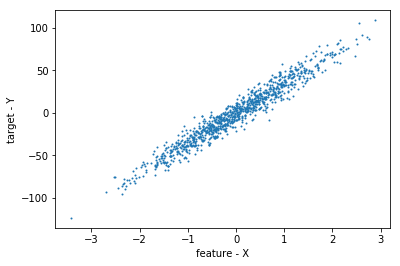

In [57]:
plt.xlabel("feature - X")
plt.ylabel("target - Y")
plt.scatter(x,y, s = 1)
plt.show()

  * Hyper Parameters are initial configuration of Models
  * Initialize LinearRegression model with default hyper-parameters

In [58]:
lr = LinearRegression()

### Common HyperParameters
 * fit_intercept ==> Whether to calculate intercept for the model not required if data is centered
 * normalize ==> X will be normalize by subtracting mean & dividing by Standard dividion 
 
     * PS: By standardizing data before subjecting to model, coef's tells the importantance of features
 
 ### Common Attributes
   * coef ==> Weights for each independent variables
   * intercept ==> bias of independent variables

### Common Functions
  * fit ==> trains the model. Input is X and Y
  * predict ==> Once model is trained for given X using predict function Y can be predicted

### Multiple Target
  * Y can be more than 1 dimension
  * Advantages of multiple target are
      * computationally fast
      * model is optimized for multiple targets
      * model do not use relationship between targets
      * model is more interpretable

### Training model
    * X should be in rows of data format, X.ndim == 2
    * Y should be 1D for simgle target & 2D for more than one target
    * fit function for training the model

In [59]:
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
lr.coef_

array([69.66523983])

In [21]:
lr.intercept_

-0.368683332281156

# Predicting using trained model

In [60]:
pred = lr.predict(x)

  * Blue dots represent maps to actual target data
  * Orange dots represent predicted data

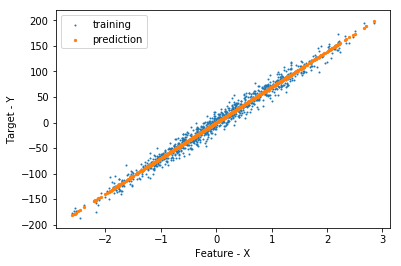

In [25]:
plt.scatter(x,y,s=1, label='training')
plt.scatter(x,pred,s=5, label='prediction')
plt.xlabel('Feature - X')
plt.ylabel('Target - Y')
plt.legend()
plt.show()

#### Limitation of Ordinary Least Square Technique¶
  * Impacted by Outliers
  * Non-linearities
  * Too many independent variables
  * Multicollinearity
  * Heteroskedasticity
  * Noise in the Independent Variables


# 3. Regularized Regression Methods
## Ridge Regression
     * Ridge Regression imposes penalty on size of coef.
     * Less impacted by outliers.
### Adding outliers to data

In [64]:
from sklearn.linear_model import Ridge
ridge_r = Ridge(alpha=.1)
linear_r = LinearRegression()
ridge_r.fit([[0, 0], [0, 0], [1, 1]],  [0, .1, 1])
linear_r.fit([[0, 0], [0, 0], [1, 1]],  [0, .1, 1])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
ridge_r.coef_

array([0.44186047, 0.44186047])

In [65]:
linear_r.coef_

array([0.475, 0.475])

In [76]:
outliers = y[950:] - 600

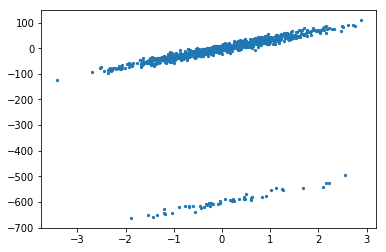

In [85]:
import numpy as np
y_Out = np.append(y[:950],outliers)
plt.scatter(x, y_Out,s=5)

Text(0.5, 1.0, 'Linear Regression')

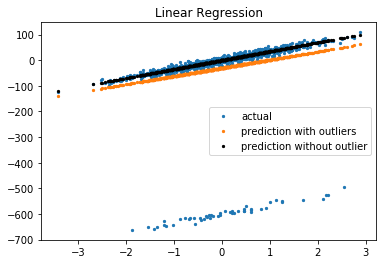

In [86]:
lr = LinearRegression()
lr.fit(x,y_Out)
pred_out = lr.predict(x)

plt.scatter(x,y_Out,s=5,label='actual')
plt.scatter(x,pred_out,s=5,label='prediction with outliers')
plt.scatter(x,pred,s=5,c='k', label='prediction without outlier')
plt.legend()
plt.title('Linear Regression')

Text(0.5, 1.0, 'Linear Regression')

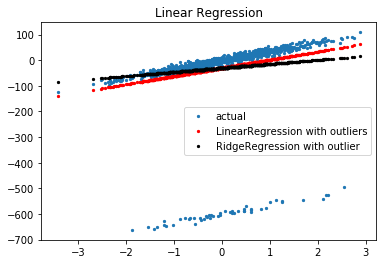

In [88]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1000)
ridge.fit(x,y_Out)
pred_ridge = ridge.predict(x)

plt.scatter(x,y_Out,s=5,label='actual')
plt.scatter(x,pred_out,s=5, c='r' ,label='LinearRegression with outliers')
plt.scatter(x,pred_ridge,s=5,c='k', label='RidgeRegression with outlier')
plt.legend()
plt.title('Linear Regression')

## Effect of alpha  using ridge on coeffecients
   * Data Generation

In [98]:
x, y, w = make_regression(n_samples = 10, n_features = 10, coef= True, random_state=1, bias = 3.5)

#### Training Ridge for different values of alpha
  * Coefs calculated are appended to a list
  * Generate 20 alphas from 10^-6 to 10^6

In [102]:
alphas = np.logspace(-6, 6, 200)
alphas[:20]

array([1.00000000e-06, 1.14895100e-06, 1.32008840e-06, 1.51671689e-06,
       1.74263339e-06, 2.00220037e-06, 2.30043012e-06, 2.64308149e-06,
       3.03677112e-06, 3.48910121e-06, 4.00880633e-06, 4.60592204e-06,
       5.29197874e-06, 6.08022426e-06, 6.98587975e-06, 8.02643352e-06,
       9.22197882e-06, 1.05956018e-05, 1.21738273e-05, 1.39871310e-05])

In [119]:
coefs = []
c = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(x, y)
    coefs.append(ridge.coef_)

#### Plotting alphas & coefs
  * Different colors represents different coefs
#### Conclusion
  * As alpha tends toward zero the coefficients found by Ridge regression stabilize towards the randomly sampled vector w (similar to LinearRegression).
  * For big alpha (strong regularisation) the coefficients are smaller (eventually converging at 0) leading to a simpler and biased solution.

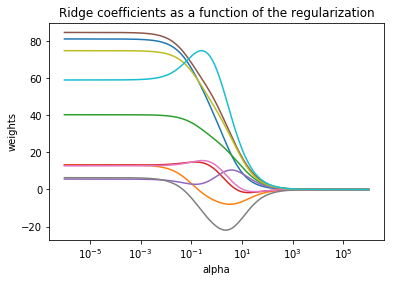

In [107]:

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.show()

#### Lasso
  * Linear model that predict's sparse coefs
  * Reduces the regressors predicting target

In [121]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=.1)
lasso.fit([[0, 0], [0, 0], [1, 1]],  [0, .1, 1])

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [122]:
lasso.coef_

array([0.5, 0. ])

## Elastic Net
  * Elastic-net is useful when there are multiple features which are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.

In [124]:
from sklearn.linear_model import ElasticNet
en = ElasticNet(alpha=.1)
en.fit([[0, 0], [0, 0], [1, 1]],  [0, .1, 1])

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [125]:
en.coef_

array([0.32589556, 0.32579954])


## 4. Logistic Regression
  * Linear Model of classification, assumes linear relationship between feature & target
  * y = e^(b0 + b1x) / (1 + e^(b0 + b1x))
  * Returns class probabilities
  * Hyperparameter : C - regularization coef
  * Fundamentally suited for bi-class classification

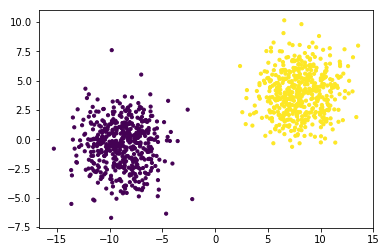

In [200]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_features=2, n_samples=1000, cluster_std=2,centers=2)
plt.scatter(X[:,0],X[:,1],c=y,s=10)

In [201]:
h = 0.2
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

/home/nari/anaconda3/envs/testdeep/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


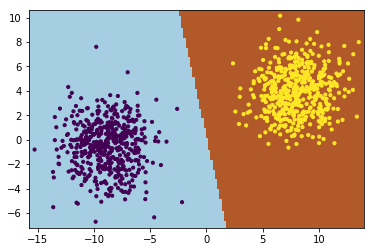

In [202]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X,y)
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=y,s=10)


## 5. Online Learning Models
  * Stochastic Gradient Descent & Passive Aggrasive Algorithms
  * Simple & Efficient to fit linear models
  * Useful where number of samples is very large ( Scale of 10^5 )
  * Supports partial_fit for out-of-core learning
  * Both the algorithms support regression & classification

In [206]:
from sklearn.datasets import make_classification, make_regression
X,y = make_classification(n_classes=2,n_features=10,n_samples=10000)
from sklearn.model_selection import train_test_split
trainX,testX, trainY,testY = train_test_split(X,y)
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(max_iter=10)

In [207]:
sgd.partial_fit(trainX[:1500],trainY[:1500], classes=[0,1])
sgd.score(testX,testY)

0.8864

In [208]:
sgd.partial_fit(trainX[1500:5000],trainY[1500:5000])
sgd.score(testX,testY)

0.8796

## 6. Robust Regression
  * Robust regression is interested in fitting a regression model in the presence of corrupt data: either outliers, or error in the model.
  * Three techniques supported by scikit - RANSAC, Theil Sen and HuberRegressor

**Comparisions - RANSAC, Theil Sen, HuberRegressor**
  * HuberRegressor should be faster than RANSAC
  * Theil Sen and RANSAC are unlikely to be as robust as HuberRegressor for the default parameters.
  * RANSAC will deal better with large outliers in the y direction
  * RANSAC is faster than Theil Sen and scales much better with the number of samples
  * RANSAC is a good default option

In [209]:
X, y, coef = make_regression(n_samples=1000, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=0)
# Add outlier data
np.random.seed(0)
X[:50] = 3 + 0.5 * np.random.normal(size=(50, 1))
y[:50] = -3 + 10 * np.random.normal(size=50)

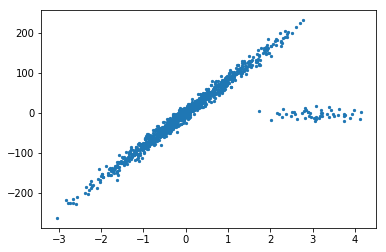

In [210]:
from sklearn.linear_model import LinearRegression,RANSACRegressor
lr = LinearRegression()
lr.fit(X, y)
ransac = RANSACRegressor()
ransac.fit(X, y)
plt.scatter(X,y,s=5)

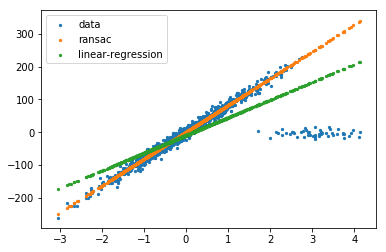

In [211]:
ransac_pred = ransac.predict(X)
lr_pred = lr.predict(X)
plt.scatter(X,y,s=5, label='data')
plt.scatter(X,ransac_pred,s=5,label='ransac')
plt.scatter(X,lr_pred,s=5, label='linear-regression')
plt.legend()

## 7. Polynomial Regression¶
  * Sometimes relationship between variables & target is of higher polynomial degree
  * Transformer can be used to convert data to higher degree
  * Linear models can predict coef of these higher degree polynomials

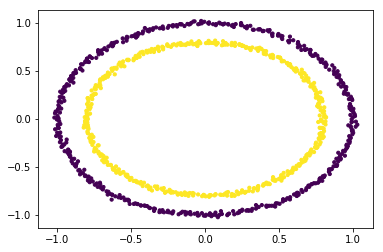

In [215]:
from sklearn.datasets import make_circles
X,y = make_circles(n_samples=1000, noise=.013)
plt.scatter(X[:,0],X[:,1],c=y,s=10)

In [216]:
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(degree=2)
X_tf = pol.fit_transform(X)
lr = LogisticRegression()
trainX,testX,trainY,testY = train_test_split(X_tf,y)
lr.fit(trainX,trainY)

/home/nari/anaconda3/envs/testdeep/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [217]:
lr.score(testX,testY)

1.0

## Bias Variance
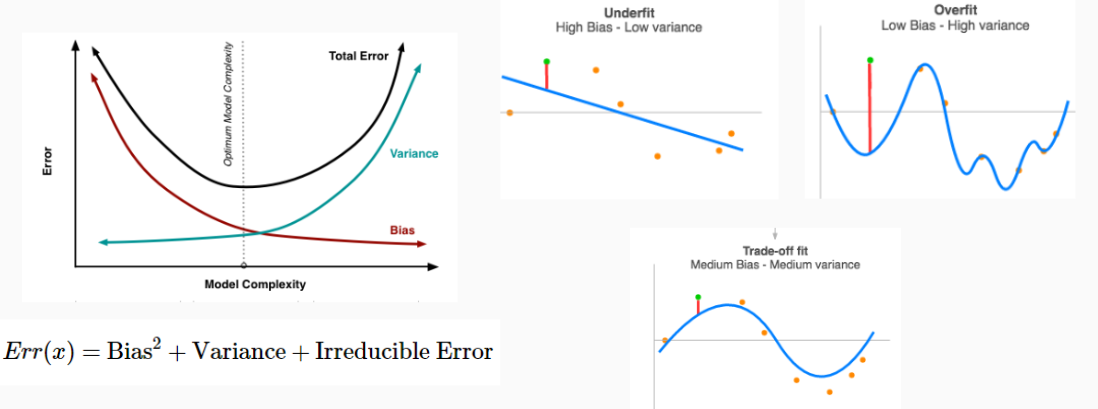

**Bias**
  * Fitting training data poorly, but produce similar result outside training data
  * we are building simple models that predicts terribly far from the reality but they don't change much from dataset to dataset.
  * Situation of underfitting.
  * A linear regression model would have high bias when trying to model a non-linear relationship.

**Variance**
  * Building complex model that fits the training data well but many not work similar way of other dataset.
  * Model is not generalized & is overfitting.

**Bias Variance TradeOff**
  * Increasing the accuracy of the model will lead to less generalization of pattern outside training data.
  * Increasing the bias will decrease the variance.
  * Increasing the variance will decrease the bias.
  * We have to get perfect balance of bias & variance